<a href="https://colab.research.google.com/github/kachmaryk/image_processing_labs/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [54]:
def plot_cv_img(input_image: np.ndarray, output_image:np.ndarray, gamma: float):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 40))
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image', fontsize=16)
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title(f'Gamma Corrected img (ɣ = {gamma})', fontsize=16)
    ax[1].axis('off')
    plt.show()

In [20]:
def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [61]:
img = cv2.imread('art_1.jpg')

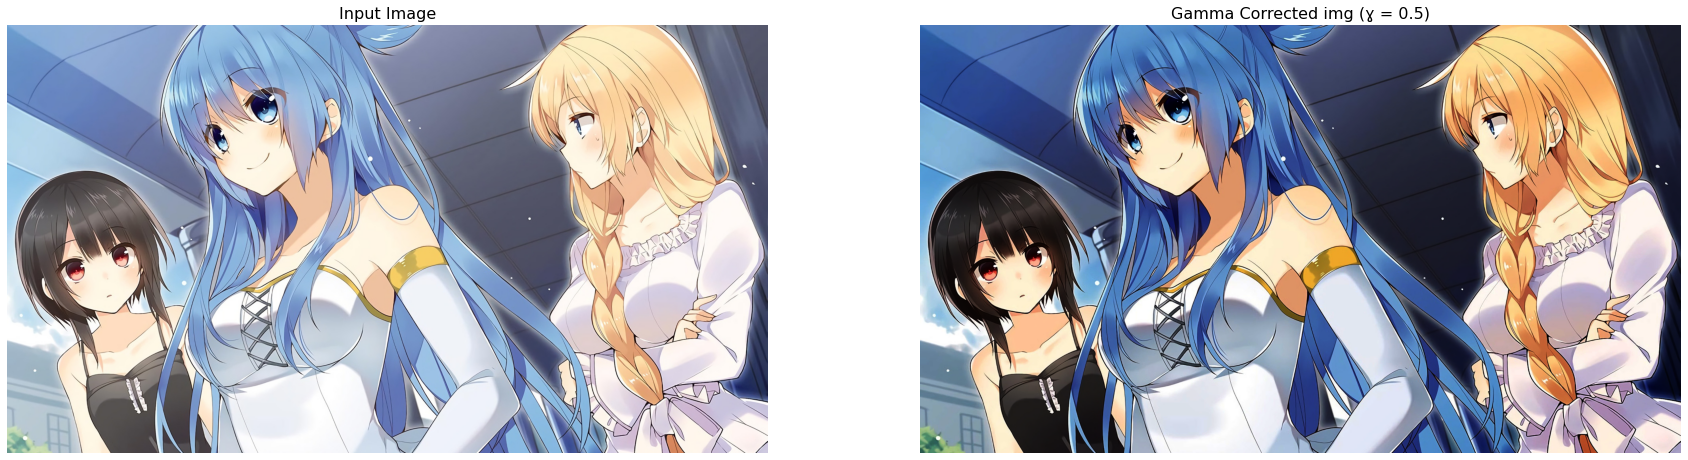

In [62]:
plot_cv_img(img, adjust_gamma(img, 0.5), 0.5)

In [64]:
img

array([[[219, 176, 133],
        [220, 177, 134],
        [220, 177, 134],
        ...,
        [107,  86,  84],
        [107,  86,  84],
        [107,  86,  84]],

       [[219, 174, 131],
        [218, 175, 132],
        [219, 176, 133],
        ...,
        [107,  86,  84],
        [107,  86,  84],
        [107,  86,  84]],

       [[216, 171, 127],
        [217, 172, 128],
        [218, 173, 129],
        ...,
        [107,  86,  84],
        [107,  86,  84],
        [107,  86,  84]],

       ...,

       [[141, 151, 105],
        [141, 151, 105],
        [141, 151, 104],
        ...,
        [223, 201, 206],
        [223, 201, 206],
        [222, 200, 205]],

       [[140, 150, 104],
        [141, 151, 105],
        [141, 151, 104],
        ...,
        [223, 201, 206],
        [222, 200, 205],
        [222, 200, 205]],

       [[137, 147, 101],
        [140, 150, 104],
        [141, 151, 105],
        ...,
        [223, 201, 206],
        [222, 200, 205],
        [220, 200, 205]]

In [104]:
img.shape

(1080, 1920, 3)

In [112]:
invGamma = 1.0 / 0.5
new_image = np.float64(img) / 255
new_image

array([[[0.85882353, 0.69019608, 0.52156863],
        [0.8627451 , 0.69411765, 0.5254902 ],
        [0.8627451 , 0.69411765, 0.5254902 ],
        ...,
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176]],

       [[0.85882353, 0.68235294, 0.51372549],
        [0.85490196, 0.68627451, 0.51764706],
        [0.85882353, 0.69019608, 0.52156863],
        ...,
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176]],

       [[0.84705882, 0.67058824, 0.49803922],
        [0.85098039, 0.6745098 , 0.50196078],
        [0.85490196, 0.67843137, 0.50588235],
        ...,
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176],
        [0.41960784, 0.3372549 , 0.32941176]],

       ...,

       [[0.55294118, 0.59215686, 0.41176471],
        [0.55294118, 0.59215686, 0.41176471],
        [0.55294118, 0

In [113]:
new_image = np.power(new_image, invGamma)
new_image

array([[[0.73757785, 0.47637063, 0.27203383],
        [0.7443291 , 0.48179931, 0.27613995],
        [0.7443291 , 0.48179931, 0.27613995],
        ...,
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211]],

       [[0.73757785, 0.46560554, 0.26391388],
        [0.73085736, 0.4709727 , 0.26795848],
        [0.73757785, 0.47637063, 0.27203383],
        ...,
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211]],

       [[0.71750865, 0.44968858, 0.24804306],
        [0.72416763, 0.45496348, 0.25196463],
        [0.73085736, 0.46026913, 0.25591696],
        ...,
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211],
        [0.17607074, 0.11374087, 0.10851211]],

       ...,

       [[0.30574394, 0.35064975, 0.16955017],
        [0.30574394, 0.35064975, 0.16955017],
        [0.30574394, 0

In [114]:
new_image *= 255
new_image = new_image.astype(np.uint8)
new_image

array([[[188, 121,  69],
        [189, 122,  70],
        [189, 122,  70],
        ...,
        [ 44,  29,  27],
        [ 44,  29,  27],
        [ 44,  29,  27]],

       [[188, 118,  67],
        [186, 120,  68],
        [188, 121,  69],
        ...,
        [ 44,  29,  27],
        [ 44,  29,  27],
        [ 44,  29,  27]],

       [[182, 114,  63],
        [184, 116,  64],
        [186, 117,  65],
        ...,
        [ 44,  29,  27],
        [ 44,  29,  27],
        [ 44,  29,  27]],

       ...,

       [[ 77,  89,  43],
        [ 77,  89,  43],
        [ 77,  89,  42],
        ...,
        [195, 158, 166],
        [195, 158, 166],
        [193, 156, 164]],

       [[ 76,  88,  42],
        [ 77,  89,  43],
        [ 77,  89,  42],
        ...,
        [195, 158, 166],
        [193, 156, 164],
        [193, 156, 164]],

       [[ 73,  84,  40],
        [ 76,  88,  42],
        [ 77,  89,  43],
        ...,
        [195, 158, 166],
        [193, 156, 164],
        [189, 156, 164]]

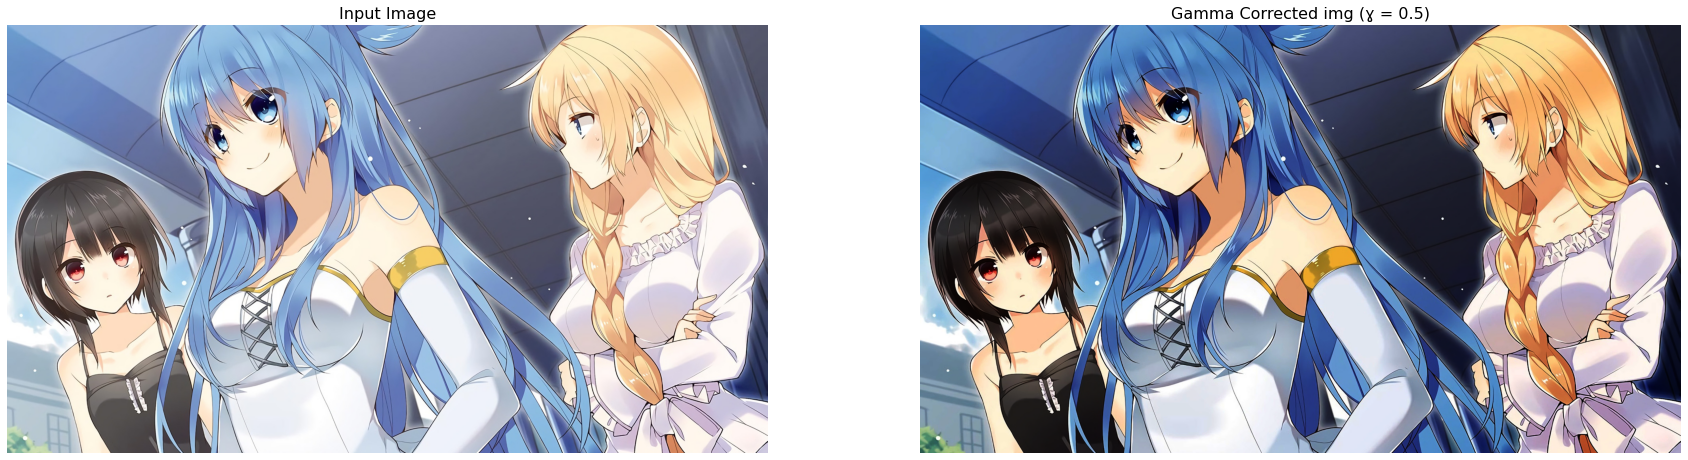

In [115]:
plot_cv_img(img, new_image, 0.5)